# 시계열분석

## #01. 작업준비

### 패키지 가져오기

In [1]:
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sb
import sys

### 데이터 가져오기

- kings데이터는 영국 왕 42명의 사망 시 나이 데이터를 정리한 csv파일이다.
- 비계절성을 띄는 시계열 자료
- 20번째 왕까지는 38세에서 55까지 수명을 유지하고, 그 이후부터는 수명이 늘어서 40번째 왕은 73세까지 생존

In [2]:
df = read_excel("https://data.hossam.kr/E06/kings.xlsx")
df

,age
0,60
1,43
2,67
3,50
4,56
5,42
6,50
7,65
8,68
9,43


### 그래프 초기화

In [3]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] =12 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.unicode_minus'] = False

## #02. 데이터 살펴보기

### 기초통계량

In [4]:
df.describe()

,age
count,42.000000
mean,55.285714
std,16.569566
min,13.000000
25%,44.000000
50%,56.000000
75%,67.750000
max,86.000000


### 기본 형태의 시계열 그래프

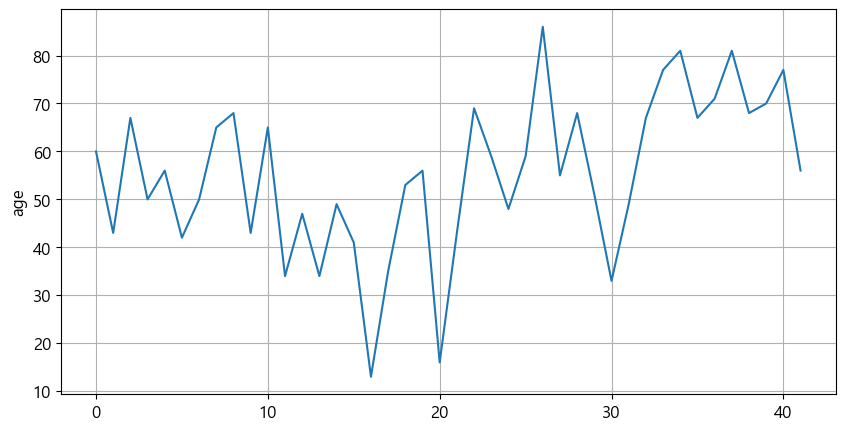

In [5]:
plt.figure()
sb.lineplot(df, x=df.index, y='age')
plt.grid()
plt.show()
plt.close()

### 평균이동

주어진 구간의 평균을 구해서 이어서 표시하는 방법

평균 이동 결과가 실제 데이터와 얼마나 차이가 나는지의 여부로 데이터를 판단

#### 1) 단순이동 평균(SMA, Simple Moving Average)
- 가장 많이 사용하는 방식

3년, 6년, 9년단위 평균

In [6]:
# 3년단위 : (0,1,2의평균, 1,2,3의 평균, 2,3,4의 평균,,,,,)
# 6년단위 : (0,1,2,3,4,5의 평균, 1,2,3,4,5,6의 평균,,,,)
df['sma3'] = df['age'].rolling(3).mean()
df['sma6'] = df['age'].rolling(6).mean()
df['sma9'] = df['age'].rolling(9).mean()
df

,age,sma3,sma6,sma9
0,60,NaN,NaN,NaN
1,43,NaN,NaN,NaN
2,67,56.666667,NaN,NaN
3,50,53.333333,NaN,NaN
4,56,57.666667,NaN,NaN
5,42,49.333333,53.000000,NaN
6,50,49.333333,51.333333,NaN
7,65,52.333333,55.000000,NaN
8,68,61.000000,55.166667,55.666667
9,43,58.666667,54.000000,53.777778


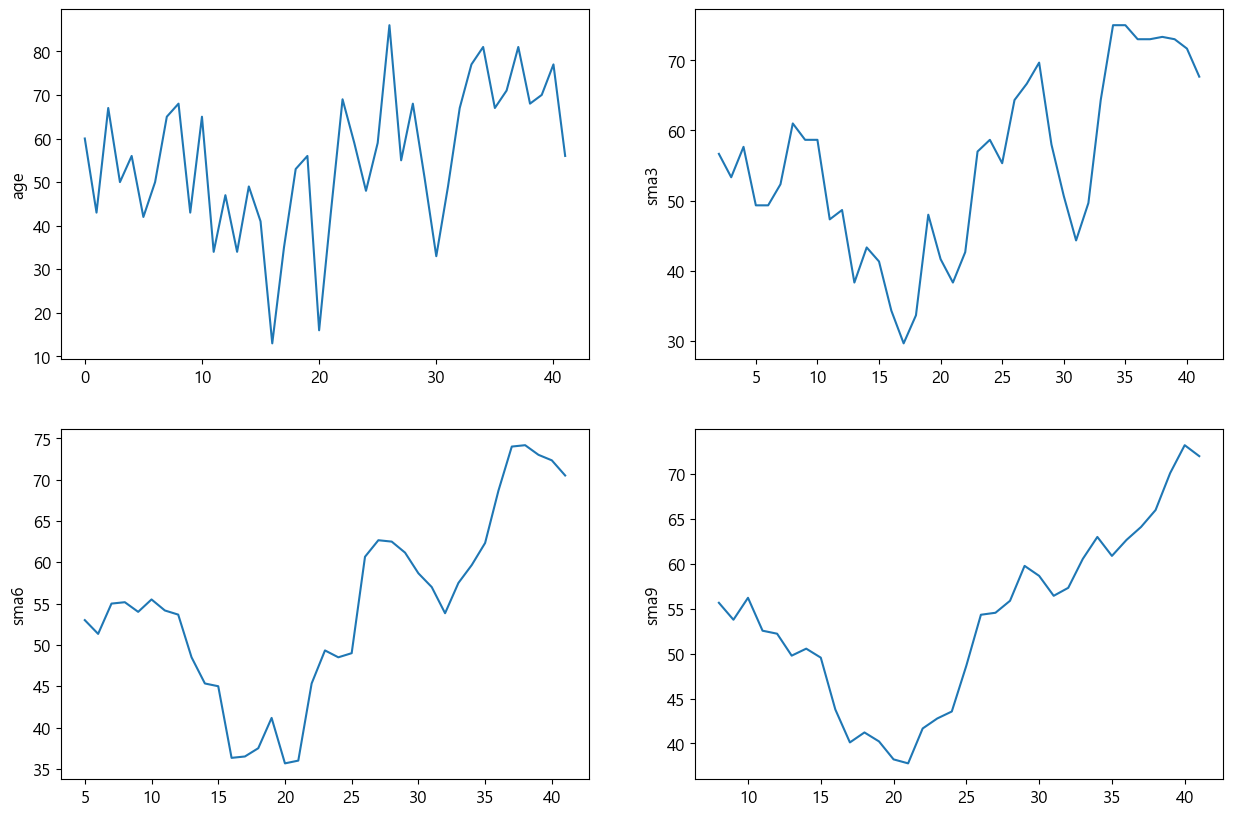

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sb.lineplot(df, x=df.index, y='age', ax=ax1)
sb.lineplot(df, x=df.index, y='sma3', ax=ax2)
sb.lineplot(df, x=df.index, y='sma6', ax=ax3)
sb.lineplot(df, x=df.index, y='sma9', ax=ax4)

plt.show()
plt.close()

# 변동이 점점 단순해진다 = (단순화 시킬수록 추세가 나타남. ) 

> 평균 이동 시각화의 목적은 데이터가 정상성을 만족하는지 확인하여 차분 적용 여부를 결정하기 위함 (거의 99% 이상이 비정상성)

### 2) 지수 이동 평균 (EMA, Exponetial Moving Average)

### 3) 가중 이동 평균 (WMA, Weighted Moving Average)